In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import pandas as pd
import statistics as stats
#plt.figure(figsize=(6, 4), dpi=120)


### Identify patterns in student performance: 
Is there are any consistent patterns in how students perform on different assessments. 
1. Чи учні які складають математику на хороший бал задають українську мову на кращий бал ніж учні які складають українську мову на хороший бал.
Do students who do well in math tend to also do well with ukrainan:)?

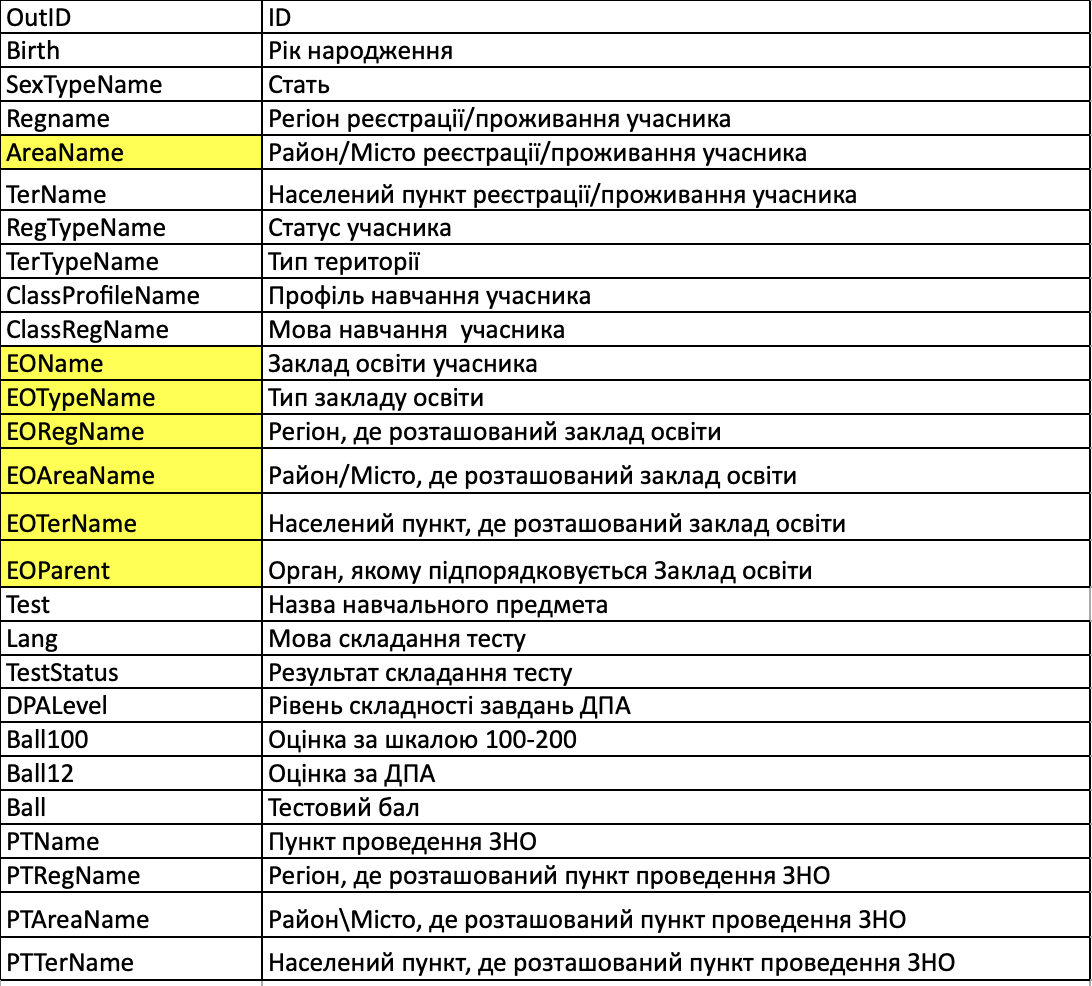

In [2]:
%matplotlib inline
from IPython.display import Image
Image('./data/columsDC.png', height=520, width=450)

In [3]:
# read working) dataset
df_2018 = pd.read_csv('./data/OpenDataZNO2018/OpenData2018.csv',on_bad_lines='skip', delimiter=";")
df_2021 = pd.read_csv('./data/OpenDataZNO2021/Odata2021File.csv', on_bad_lines='skip', delimiter=";")

/var/folders/v8/168v_dl56g5d7vs69j_j7nkc0000gn/T/ipykernel_74119/430438853.py:2: DtypeWarning: Columns (119) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2018 = pd.read_csv('./data/OpenDataZNO2018/OpenData2018.csv',on_bad_lines='skip', delimiter=";")
/var/folders/v8/168v_dl56g5d7vs69j_j7nkc0000gn/T/ipykernel_74119/430438853.py:3: DtypeWarning: Columns (117,118,119,121,123,124,125,126,137,138,139,141,143,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2021 = pd.read_csv('./data/OpenDataZNO2021/Odata2021File.csv', on_bad_lines='skip', delimiter=";")


In [4]:
print(list(df_2018.columns))
print(len(df_2018))

['OUTID', 'Birth', 'SEXTYPENAME', 'REGNAME', 'AREANAME', 'TERNAME', 'REGTYPENAME', 'TerTypeName', 'ClassProfileNAME', 'ClassLangName', 'EONAME', 'EOTYPENAME', 'EORegName', 'EOAreaName', 'EOTerName', 'EOParent', 'UkrTest', 'UkrTestStatus', 'UkrBall100', 'UkrBall12', 'UkrBall', 'UkrPTName', 'UkrPTRegName', 'UkrPTAreaName', 'UkrPTTerName', 'histTest', 'HistLang', 'histTestStatus', 'histBall100', 'histBall12', 'histBall', 'histPTName', 'histPTRegName', 'histPTAreaName', 'histPTTerName', 'mathTest', 'mathLang', 'mathTestStatus', 'mathBall100', 'mathBall12', 'mathBall', 'mathPTName', 'mathPTRegName', 'mathPTAreaName', 'mathPTTerName', 'physTest', 'physLang', 'physTestStatus', 'physBall100', 'physBall12', 'physBall', 'physPTName', 'physPTRegName', 'physPTAreaName', 'physPTTerName', 'chemTest', 'chemLang', 'chemTestStatus', 'chemBall100', 'chemBall12', 'chemBall', 'chemPTName', 'chemPTRegName', 'chemPTAreaName', 'chemPTTerName', 'bioTest', 'bioLang', 'bioTestStatus', 'bioBall100', 'bioBall12',

In [20]:
natural_science_exams = {
    'Mathematic': "mathBall100",
    #'Physics': 'physBall100',
    #'Chemistry': 'chemBall100',
    #'Geography': 'geoBall100' ,
    #'Biology': 'bioBall100'
}
humanities_exams = {
    'Ukrainian and Ukr. lit.': 'UkrBall100',
    #'English': 'engBall100',
    #'History': 'histBall100',
    #'German': 'deuBall100'
}

balls = {
    'Unsatisfactorily': [0,60],
    'satisfactory': [60, 75],
    'good': [76, 90],
    'excellent': [91,100]
}
grade_colors = {
    'Unsatisfactorily': 'red',
    'satisfactory': 'orange',
    'good': 'green',
    'excellent': 'blue'
}

Репрезантативність вибірки з кожного предмету

## Розподіл оцінок з української мови та математики

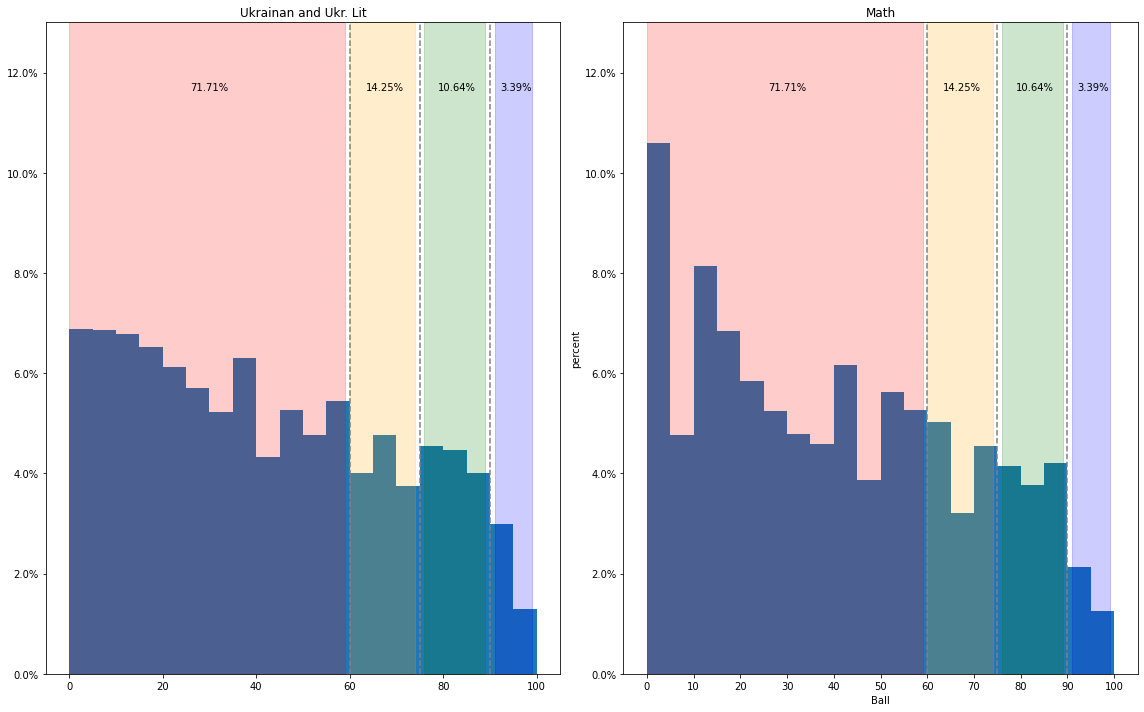

In [78]:
%matplotlib inline
fig, axs = plt.subplots(1,2, tight_layout=True,figsize=(16, 10))
plt.xticks(list(range(0, 105, 10)))
plt.xlabel('Ball')
plt.ylabel('percent')

def prepare_data(data):
    data  = data.dropna()[data.dropna() >= 100]
    data = data - 100
    return data

def plot_exam_hist(data, ax, xlable, ylable, title):
    # add labels and title
    ax.set_title(title)
    
    # norm hist
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax.hist(data, bins=20, weights=np.ones(len(data)) / len(data))
    return ax



def styles(axs):
    max_y = round(max([i.get_ylim()[1] for i in axs])*1.2,2)
    axs[0].set_ylim(bottom=0, top=max_y)
    axs[1].set_ylim(bottom=0, top=max_y)
    for ax in axs: 
        # add vertical lines to divide subplot into four areas
        ax.axvline(x=60, color='gray', linestyle='--')
        ax.axvline(x=75, color='gray', linestyle='--')
        ax.axvline(x=90, color='gray', linestyle='--')

        ss = ax.get_ylim()[1]
        # fill each grade area with a different color

        for ball_grade, r in balls.items():
            percent = round(len(data[(data >= r[0]) & (data <= r[1])])/len(data)*100,2)
            ax.fill_between(np.arange(r[0], r[1]), 0, ss, color=grade_colors[ball_grade], alpha=0.2)
            ax.text((r[1]+r[0])/2, float(ss*0.90), f"{percent}%",  ha='center', va='center')


    

urk_data = prepare_data(df_2018['UkrBall100'])
plot_exam_hist(urk_data, axs[0], xlable='Ball', ylable='percent', title='Ukrainan and Ukr. Lit')

math_data = prepare_data(df_2018['mathBall100'])
plot_exam_hist(math_data, axs[1], xlable='Ball', ylable='percent', title='Math')

styles(axs)
plt.show()


In [79]:
#Порівняння середніх балів
df_clean = df_2018.dropna()
mathBall100_mode = stats.mode(math_data)
mathBall100_avg = math_data.mean()
mathBall100_median = math_data.median()
UkrBall100_mode = stats.mode(urk_data)
UkrBall100_avg = urk_data.mean()
UkrBall100_median = urk_data.median()

# print the results side by side using f-strings
print(f"{'':<8}{'mathBall100':<15}{'UkrBall100':<15}")
print(f"{'Mode:':<8}{mathBall100_mode:<15}{UkrBall100_mode:<15}")
print(f"{'Average:':<8}{mathBall100_avg:<15.1f}{UkrBall100_avg:<15.1f}")
print(f"{'Median:':<8}{mathBall100_median:<15.1f}{UkrBall100_median:<15.1f}")

        mathBall100    UkrBall100     
Mode:   0.0            11.0           
Average:40.8           42.4           
Median: 38.0           39.0           


In [105]:
#Порівняння середніх балів для балу менше 60
math_data1 = math_data[math_data <= 60]
urk_data1 = urk_data[urk_data <= 60]
mathBall100_mode = stats.mode(math_data1)
mathBall100_avg = math_data1.mean()
mathBall100_median = math_data1.median()
UkrBall100_mode = stats.mode(urk_data1)
UkrBall100_avg = urk_data1.mean()
UkrBall100_median = urk_data1.median()

# print the results side by side using f-strings
print(f"{'':<8}{'mathBall100':<15}{'UkrBall100':<15}")
print(f"{'Mode:':<8}{mathBall100_mode:<15}{UkrBall100_mode:<15}")
print(f"{'Average:':<8}{mathBall100_avg:<15.1f}{UkrBall100_avg:<15.1f}")
print(f"{'Median:':<8}{mathBall100_median:<15.1f}{UkrBall100_median:<15.1f}")

        mathBall100    UkrBall100     
Mode:   0.0            11.0           
Average:26.7           28.1           
Median: 24.0           27.0           


In [86]:

students_that_pass_math_and_urk = df_2018.dropna(subset=['mathBall100','UkrBall100'])[(df_2018['UkrBall100'] >= 100 ) & (df_2018['mathBall100'] >= 100)]




/var/folders/v8/168v_dl56g5d7vs69j_j7nkc0000gn/T/ipykernel_74119/1579383683.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  students_that_pass_math_and_urk = df_2018.dropna(subset=['mathBall100','UkrBall100'])[(df_2018['UkrBall100'] >= 100 ) & (df_2018['mathBall100'] >= 100)]


In [87]:
len(students_that_pass_math_and_urk)


84331

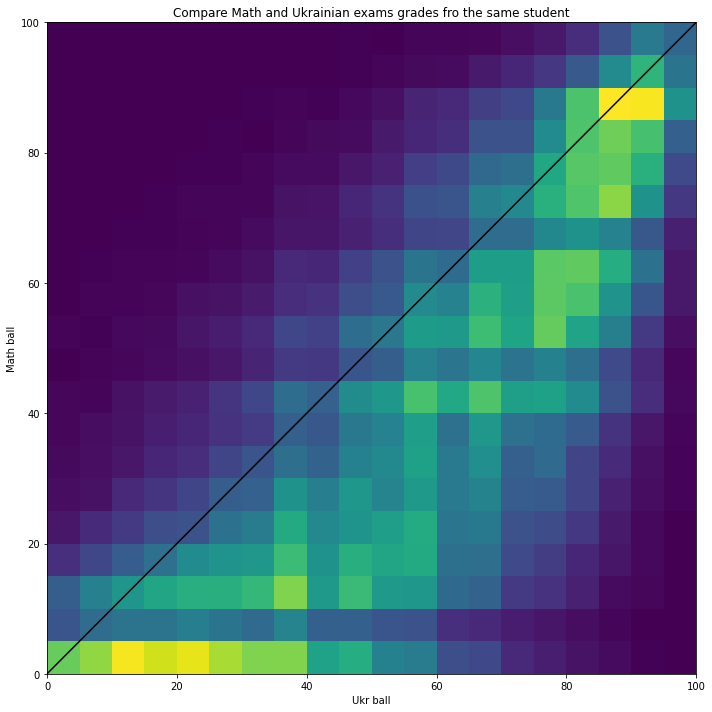

In [104]:
fig, ax = plt.subplots(tight_layout=True,figsize=(10, 10))

hist = ax.hist2d(prepare_data(students_that_pass_math_and_urk['UkrBall100']), 
                 prepare_data(students_that_pass_math_and_urk['mathBall100']),  bins = [20, 20])

plt.xlabel('Ukr ball')
plt.ylabel('Math ball')
plt.title('Compare Math and Ukrainian exams grades fro the same student')

# plot diagonal line
ax.plot([0, 100], [0, 100],'-k', transform=ax.transAxes)

plt.show()

In [139]:
# Розподіл оцінок для учнів, які склали математику на менше ніж 20 балів
students_that_pass_math_and_urk_1 = students_that_pass_math_and_urk.copy()
students_that_pass_math_and_urk_1['mathBall100'] = students_that_pass_math_and_urk['mathBall100'] - 100
m_p = len(students_that_pass_math_and_urk_1[students_that_pass_math_and_urk_1['mathBall100'] <=20])/len(students_that_pass_math_and_urk_1)*100
print('%учнів з балом з математики <=20 :      ',round(m_p,2))
print('середній бал з вибірки вище:            ',round(students_that_pass_math_and_urk_1[students_that_pass_math_and_urk_1['mathBall100'] <=20]['UkrBall100'].mean() - 100,2)) 
print("Мода з укр. мови та літ. з вибірки вище:",stats.mode(students_that_pass_math_and_urk_1[students_that_pass_math_and_urk_1['mathBall100'] <=20]['UkrBall100'] - 100))

# 


%учнів з балом з математики <=20 :       28.94
середній бал з вибірки вище:             34.83
Мода з укр. мови та літ. з вибірки вище: 24.0


### Висновок:
- Як видно з загального аналізу оцінок Математики і Українській мові, розроділ оцінок по рівням є приблизно онадквим, але в розподілі менше <60 балів, набагато більше студентів не справились з іспитом. Мода, середнє і медіана в цій групі є більшою для укаїнської мови.
- З аналізу розподілу оцінок учнів які здавали українську мову і математику, видно наступне:
    - Роподіл оцінок відхиляється від нормального.
    - При цьому видно, що учні в цілому краще справлються з україською мовою, ніж з математикою.
    - В цілому учні краще знають українську мову ніж математику.
    - "Аномалія" для низьких оцінок з математики і їхніх відповідних оцінок з укр. мови та літ. наштовхує на гіпотизу, що іспит з укр. мови і літ. є менш складним, що і викликає таку нерівність в розподілі